In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv"


In [24]:
df = pd.read_csv(url)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [26]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


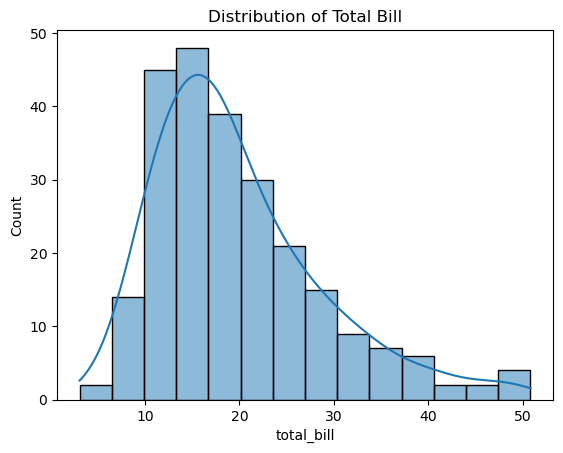

In [27]:
sns.histplot(df["total_bill"],kde=True)
plt.title("Distribution of Total Bill")
plt.show()

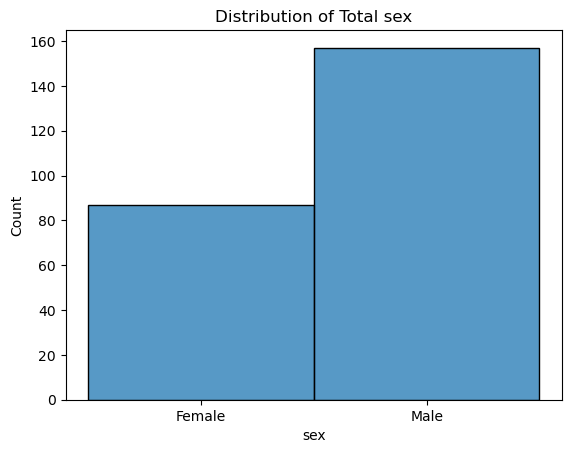

In [28]:
sns.histplot(df["sex"],kde=False)
plt.title("Distribution of Total sex")
plt.show()

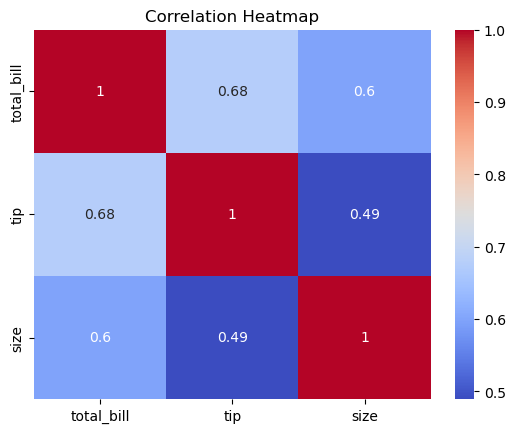

In [32]:
del df["sex"]
del df["smoker"]
del df["day"]
del df["time"]
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

df = pd.read_csv(url)

male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']

t_stat, p_value = ttest_ind(male_tips, female_tips)
print("T-Statistic: ", t_stat)
print("P-Value: ", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Reject all null hypothesis: Significant difference")
else:
    print("Fail to Reject all null hypothesis: NO Significant difference")

T-Statistic:  1.387859705421269
P-Value:  0.16645623503456755
Fail to Reject all null hypothesis: NO Significant difference


Slope:  0.10502451738435337
Intercept:  0.9202696135546731
R-Squared:  0.45661658635167657


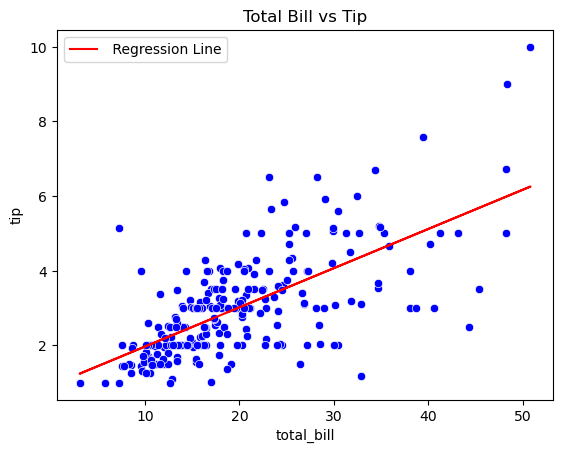

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values

model = LinearRegression()
model.fit(X, y)

print("Slope: ", model.coef_[0])
print("Intercept: ", model.intercept_)
print("R-Squared: ", model.score(X,y))

# Plot regression
sns.scatterplot(x = df['total_bill'], y = df['tip'], color = 'blue')
plt.plot(df['total_bill'], model.predict(X), color = "Red", label = " Regression Line")
plt.title("Total Bill vs Tip")
plt.legend()
plt.show()